In [337]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [338]:
pd.set_option('display.max_columns', 500)

In [339]:
Data = pd.read_csv('train.csv')
print(Data.shape)
print('#################')
Data.info()

(1460, 81)
#################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null objec

In [340]:
Data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
Data.describe([0.25,0.50,0.75,0.99])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [342]:
#checking Null values
round(Data.isnull().sum()/len(Data.index),2).sort_values(ascending=False).head(18)


PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [343]:
#For Dropping columns having more than 10% threshold 
round(Data.isnull().sum()/len(Data.index),2)[round(Data.isnull().sum()/
                                                                 len(Data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [344]:
Data = Data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')


In [345]:
#try to convert the Year columns with the age,we are going to fill these columns with number i.e max year()-yearvalue()
Data['YearBuiltage'] = Data.YearBuilt.max()-Data.YearBuilt
Data['YearRemodAddage'] = Data.YearRemodAdd.max()-Data.YearRemodAdd
Data['GarageYrBltage'] = Data.GarageYrBlt.max()-Data.GarageYrBlt
Data['YrSoldage'] = Data.YrSold.max()-Data.YrSold
Data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuiltage','YearRemodAddage',
             'GarageYrBltage','YrSoldage']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuiltage,YearRemodAddage,GarageYrBltage,YrSoldage
603,2004,2005,2004.0,2010,6,5,6.0,0
1356,1966,1966,1966.0,2008,44,44,44.0,2
183,2003,2003,2003.0,2008,7,7,7.0,2
288,1967,1967,1970.0,2010,43,43,40.0,0
227,1970,1970,1987.0,2008,40,40,23.0,2
783,1978,1978,1978.0,2009,32,32,32.0,1
1317,2006,2007,2006.0,2007,4,3,4.0,3
1182,1996,1996,1996.0,2007,14,14,14.0,3
213,1995,1995,1996.0,2006,15,15,14.0,4
1143,1959,1959,NaN,2008,51,51,NaN,2


In [346]:
Data = Data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis='columns')
# Month Sold has also been removed as it is not required to calculate the time since house was sold

In [347]:
#check columns having missing value between 0-10%
round(Data.isnull().sum()/len(Data.index),2)[round(Data.isnull().sum()/
                                                                 len(Data.index),2).values>0.00]

MasVnrType        0.01
MasVnrArea        0.01
BsmtQual          0.03
BsmtCond          0.03
BsmtExposure      0.03
BsmtFinType1      0.03
BsmtFinType2      0.03
GarageType        0.06
GarageFinish      0.06
GarageQual        0.06
GarageCond        0.06
GarageYrBltage    0.06
dtype: float64

In [348]:
#handling Missing values
#Imputing GarageYrBltage with -1 because house does not have garage.
# Rest of the values are replaced with average values as per data dictionary
# MasVnrArea has been replaced with mean
Data.MasVnrType.fillna('None',inplace=True)
Data.MasVnrArea.fillna(Data.MasVnrArea.mean(),inplace=True)
Data.BsmtQual.fillna('TA',inplace=True)
Data.BsmtCond.fillna('TA',inplace=True)
Data.BsmtExposure.fillna('No',inplace=True)
Data.BsmtFinType1.fillna('Unf',inplace=True)
Data.BsmtFinType2.fillna('Unf',inplace=True)
Data.GarageType.fillna('Attchd',inplace=True)
Data.GarageYrBltage.fillna(-1,inplace=True)
Data.GarageFinish.fillna('Unf',inplace=True)
Data.GarageQual.fillna('TA',inplace=True)
Data.GarageCond.fillna('TA',inplace=True)

In [349]:
print(Data.Street.value_counts())
print(Data.Utilities.value_counts())
print(Data.Id.value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64


In [350]:
#dropping 'Street,Utilities&Id' columns as these are unique values and could not be used in prediction
Data = Data.drop(['Street','Utilities','Id'],axis='columns')


In [351]:
Data[list(Data.dtypes[Data.dtypes!='object'].index)].describe()


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuiltage,YearRemodAddage,GarageYrBltage,YrSoldage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [352]:
# MS Sub Class should be a categorical variable as per data dictionary
# Hence, we will convert this numeric column into a string column
Data['MSSubClass']= Data['MSSubClass'].apply(str)

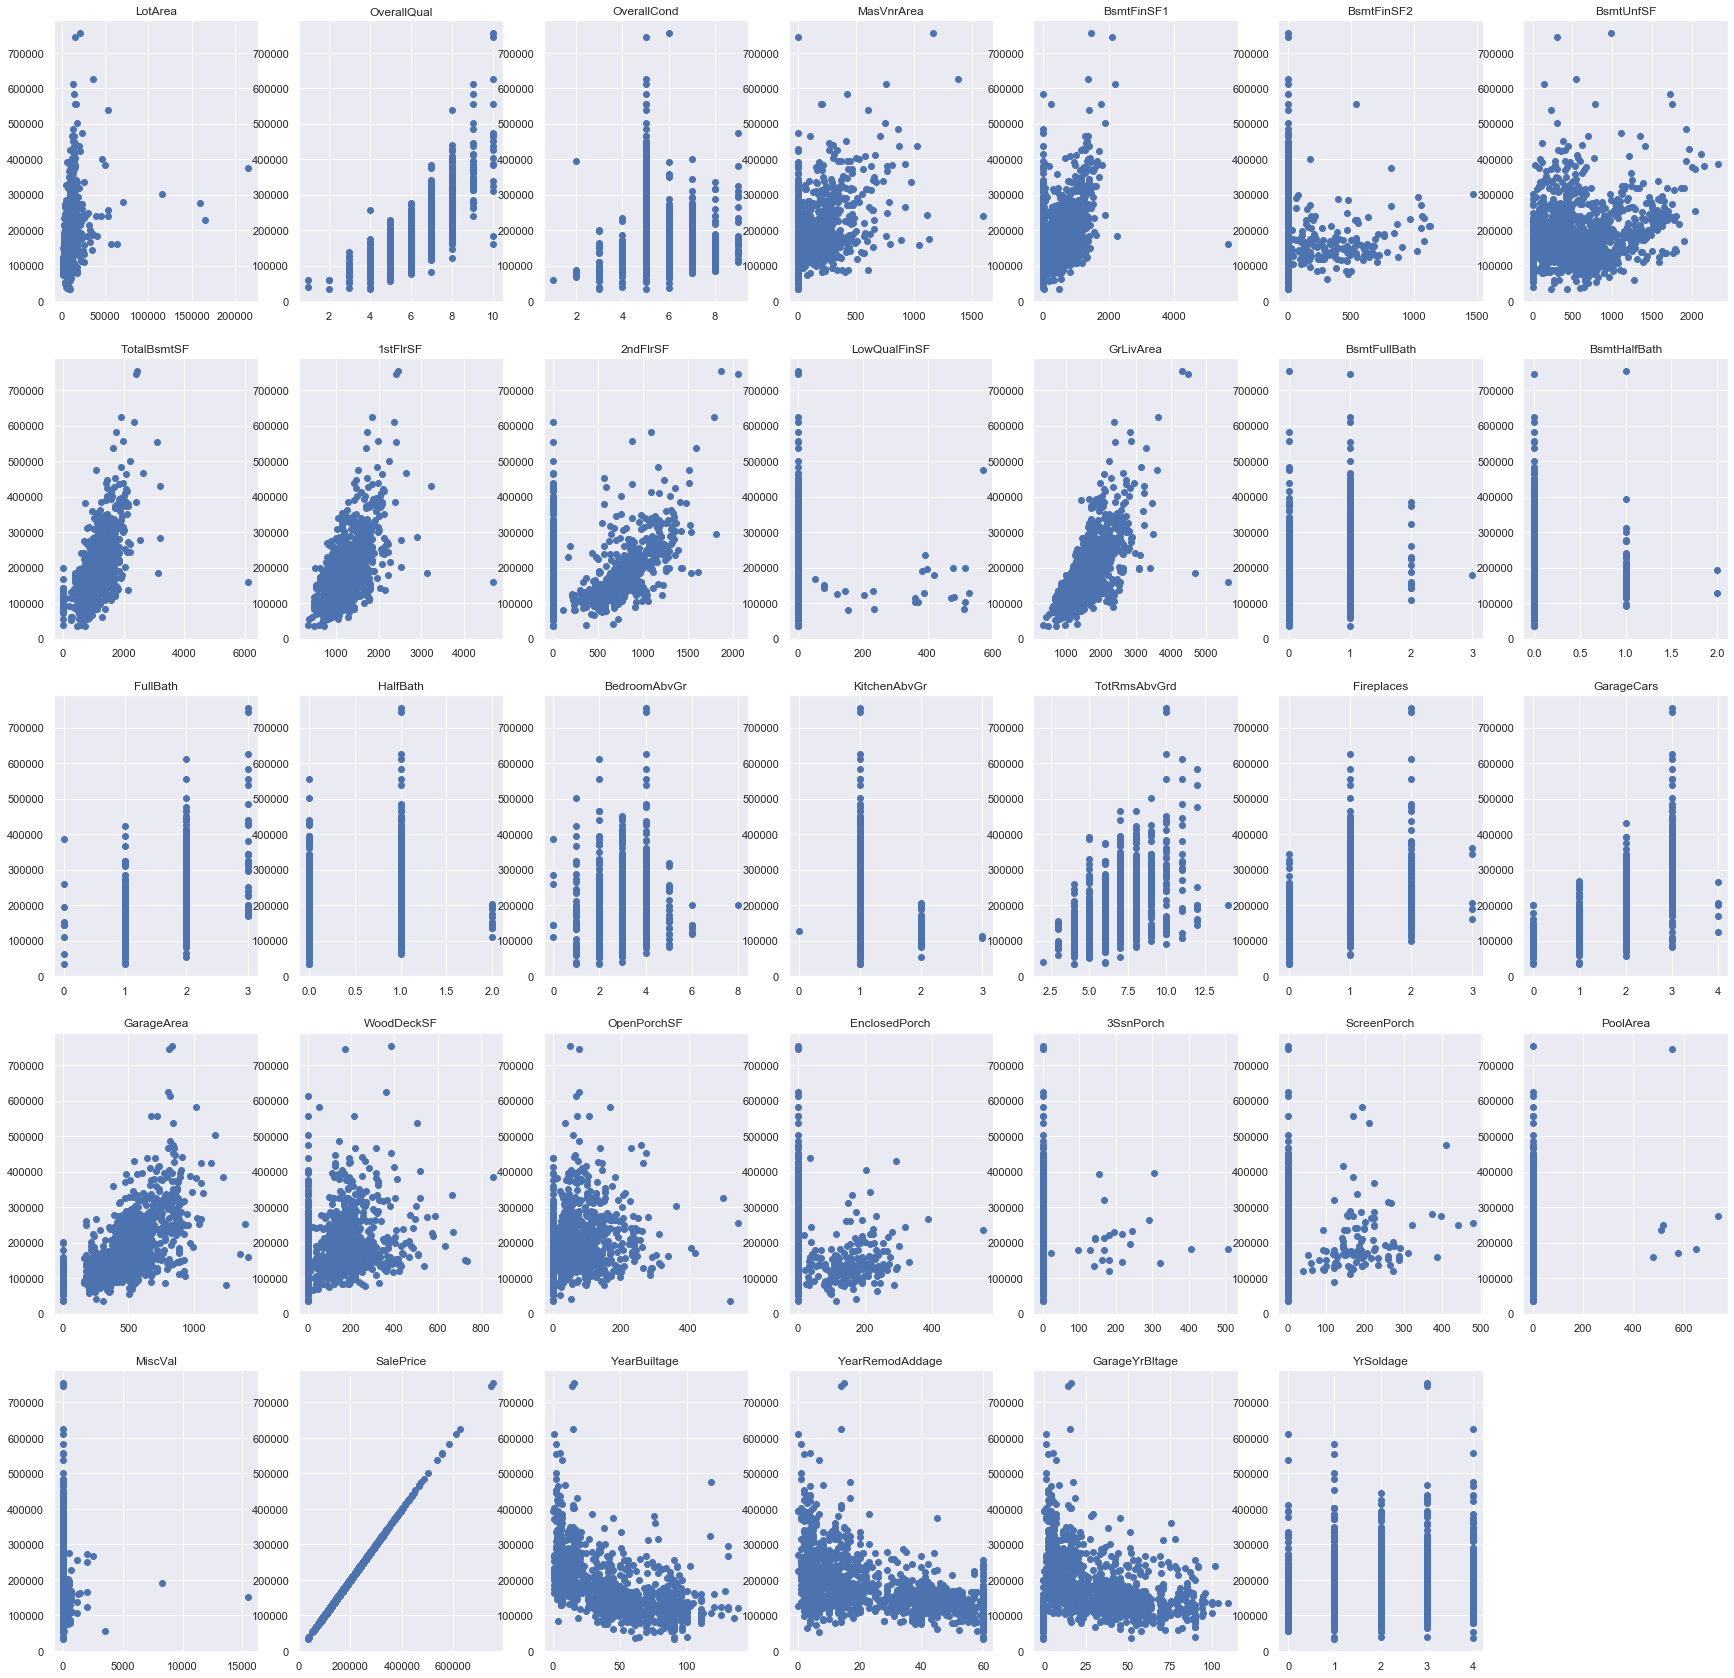

In [353]:
#Plotting 
#graphs for EDA
# There are scatter plots for numeric variables
list_numericcols = list(Data.dtypes[Data.dtypes!='object'].index)

plt.figure(figsize=(30,30))
for x in range(0,len(list_numericcols)):
    plt.subplot(5,7,x+1)
    plt.title(list_numericcols[x])
    plt.scatter(Data[list_numericcols[x]],Data.SalePrice)

In [354]:
# Commentary for the above scatter plots


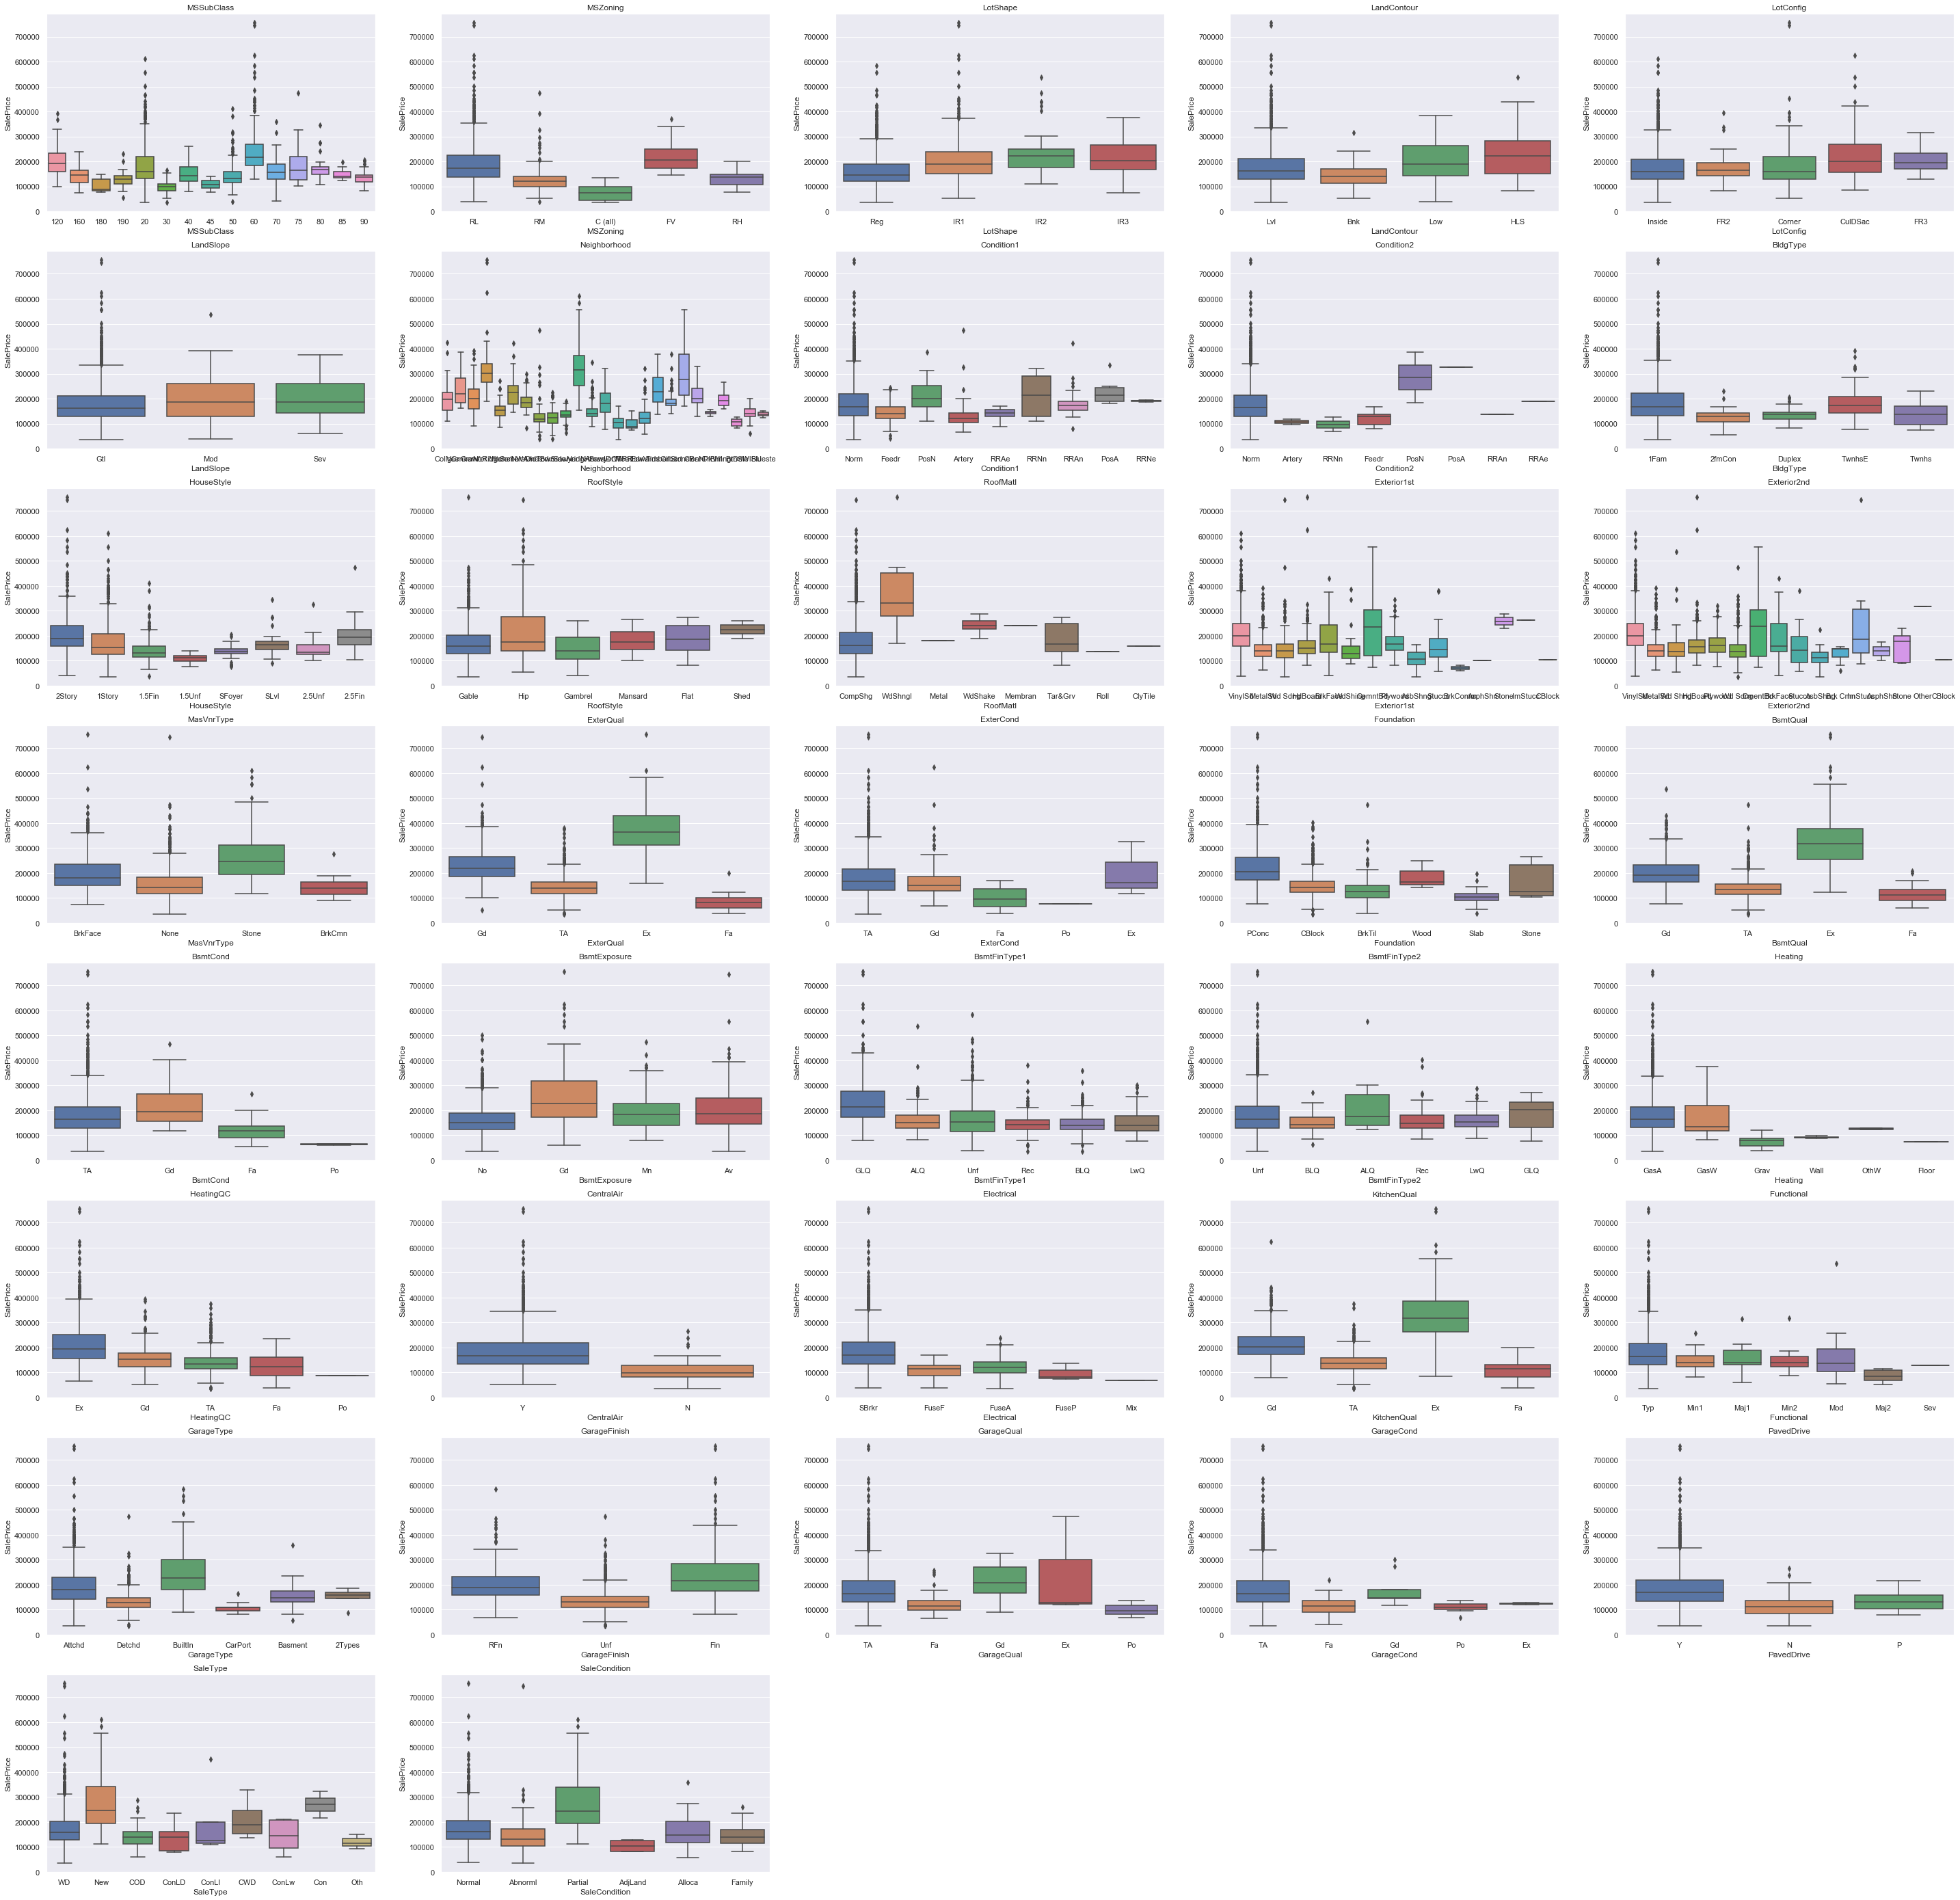

In [355]:
#Plotting 
#graphs for EDA
# There are box plots for categorical variables

list_categorycols = list(Data.dtypes[Data.dtypes=='object'].index)

plt.figure(figsize=(50,50))
for x in range(0,len(list_categorycols)):
    plt.subplot(8,5,x+1)
    plt.title(list_categorycols[x])
    sns.boxplot(x=Data[list_categorycols[x]],y=Data.SalePrice)

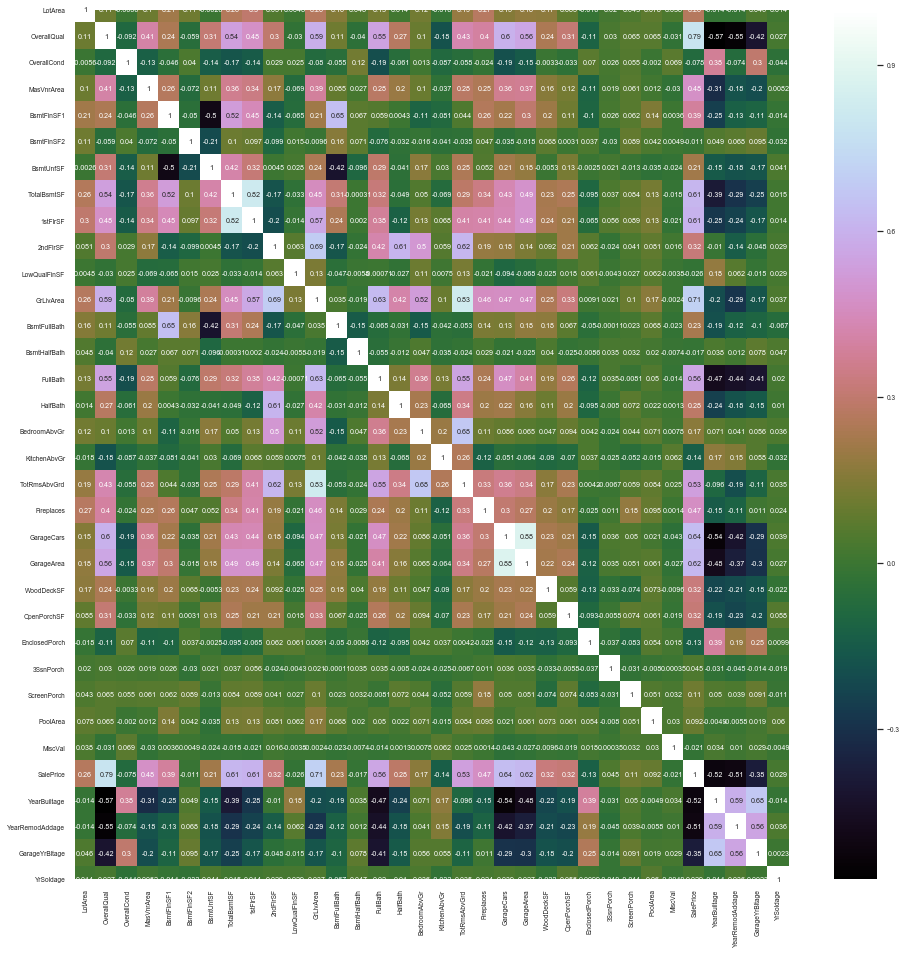

In [356]:
#Heatmap for seeing correlation between variables 
sns.set(font_scale=0.6)
plt.figure(figsize=(16,16))
sns.heatmap(Data[list(Data.dtypes[Data.dtypes!='object'].index)].corr(),annot=True,cmap="cubehelix")
plt.show()

In [357]:
print(Data.shape)
print("#############")
# creating a function for handling Outliers
# lower and upper quantile as 0.25 & 0.99
numcol = list(Data.dtypes[Data.dtypes !='object'].index)
numcol = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in numcol:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

Data = drop_outliers(Data)
print(Data.shape)

(1460, 71)
#############
(1441, 71)


In [358]:
Data[list(Data.dtypes[Data.dtypes=='object'].index)].head()


,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [359]:
Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [360]:
# we can clearly see that the above columns are having some kind of order and hence we can consider them ordinal in nature
# These columns have been converted from a nominal scale to an ordinal scale having numeric values since these are ranked
# as per data dictionary

In [361]:
#converting these columns 
Data['LandSlope'] = Data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
Data['ExterQual'] = Data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Data['BsmtQual'] = Data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Data['BsmtCond'] = Data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Data['BsmtExposure'] = Data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
Data['BsmtFinType1'] = Data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Data['BsmtFinType2'] = Data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Data['HeatingQC'] = Data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Data['CentralAir'] = Data.CentralAir.map({'N':0,'Y':1})
Data['KitchenQual'] = Data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Data['GarageFinish'] = Data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
Data['GarageQual'] = Data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Data['GarageCond'] = Data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Data['ExterCond'] = Data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Data['LotShape'] = Data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})


In [362]:
#looking after converting
Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [363]:
Data[list(Data.dtypes[Data.dtypes=='object'].index)].head()

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,20,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,70,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,60,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [364]:
#creating Dummy variables 
#joining Dummy variables with original Dataset 
dummycols = pd.get_dummies(Data[list(Data.dtypes[Data.dtypes=='object'].index)], drop_first=True)

Data = pd.concat([Data,dummycols],axis='columns')

Data = Data.drop(list(Data.dtypes[Data.dtypes=='object'].index),axis='columns')


In [365]:
Data.head()

,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuiltage,YearRemodAddage,GarageYrBltage,YrSoldage,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,0,0,0,0,208500,7,7,7.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,0,0,0,0,181500,34,34,34.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [366]:
Data.shape
# There are 206 columns which will will go as an input to the regression model

(1441, 206)

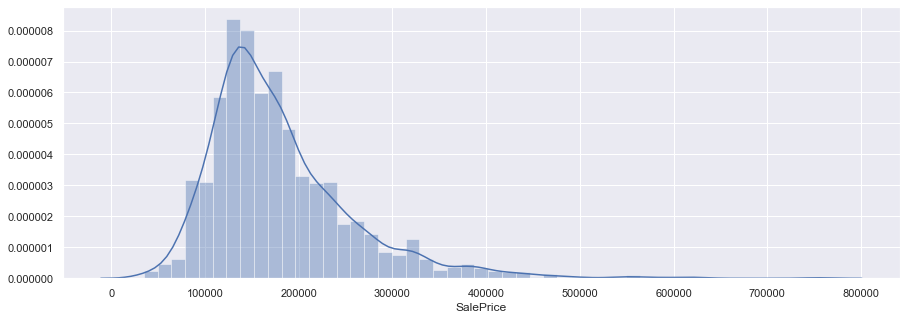

In [367]:
#checking distribution of target variables before scaling and Splitting
sns.set(font_scale=1.0)
plt.figure(figsize=(15,5))
sns.distplot(Data.SalePrice)
plt.show()

In [368]:
# creating Train and test dataset
df_train,df_test = train_test_split(Data,train_size=0.7,test_size=0.3,random_state=42)


In [369]:
Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [370]:
#Scaling the train dataset(dependent variables,as scale of our dependent valriable SalePrice is very different with the independent variable)
# cols = ['MSSubClass','LotArea','OverallQual','OverallCond',
#        'MasVnrArea','BsmtFinSF1',
#            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#            'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
#            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
#            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
# #            'ScreenPorch','PoolArea','MiscVal','SalePrice']

# Storing all the colums in the variable 'all_cols'

all_cols = df_train.columns

scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

In [371]:
# Since this will return a numpy array
# Convetting it back to a Dataframe
df_train = pd.DataFrame(df_train,columns=all_cols)
df_test = pd.DataFrame(df_test,columns=all_cols)

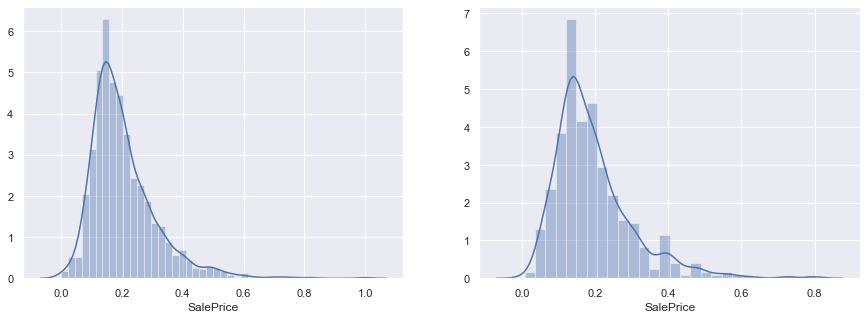

In [372]:
#checking distribution after scaling 
sns.set(font_scale=1.0)
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)


In [373]:
#splitting dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [374]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [375]:
# Not going with RFE as Ridge and Lasso Regression can tackle the concern of feature selection
#using RFE to find optimal number of feature. Currently, only 50/205 variables are taken
# print(len(X_train.columns))
# print("############")
# lm  = LinearRegression()
# lm.fit(X_train,y_train)
# rfe = RFE(lm,50)
# rfe.fit(X_train,y_train)


In [376]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [377]:
# rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
# rfe_scores.columns = ['Column_Names','Status','Rank']
# rfe_scores.shape

In [378]:
# rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
# len(rfe_sel_columns)

In [379]:
# Top 50 predictors based on RFE
# rfe_sel_columns

In [380]:
#filtering Train and Test dataset for selected RFE columns
# X_train = X_train[rfe_sel_columns]
# X_test = X_test[rfe_sel_columns]

In [381]:
#Lasso Regression Model
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print("#############")
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8535144733164415
#############
0.8504996035100237


In [382]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
print(list(zip(col,model_parameter)))

[('LotArea', -0.063), ('LotShape', 0.0), ('LandSlope', -0.0), ('OverallQual', 0.0), ('OverallCond', 0.132), ('MasVnrArea', 0.0), ('ExterQual', 0.0), ('ExterCond', 0.037), ('BsmtQual', 0.0), ('BsmtCond', 0.029), ('BsmtExposure', 0.0), ('BsmtFinType1', 0.023), ('BsmtFinSF1', 0.004), ('BsmtFinType2', 0.052), ('BsmtFinSF2', 0.0), ('BsmtUnfSF', 0.0), ('TotalBsmtSF', 0.0), ('HeatingQC', 0.018), ('CentralAir', 0.0), ('1stFlrSF', 0.0), ('2ndFlrSF', 0.0), ('LowQualFinSF', 0.001), ('GrLivArea', 0.0), ('BsmtFullBath', 0.244), ('BsmtHalfBath', 0.0), ('FullBath', -0.0), ('HalfBath', 0.0), ('BedroomAbvGr', 0.0), ('KitchenAbvGr', 0.0), ('KitchenQual', -0.0), ('TotRmsAbvGrd', 0.048), ('Fireplaces', 0.0), ('GarageFinish', 0.028), ('GarageCars', 0.01), ('GarageArea', 0.002), ('GarageQual', 0.055), ('GarageCond', 0.0), ('WoodDeckSF', 0.0), ('OpenPorchSF', 0.0), ('EnclosedPorch', 0.0), ('3SsnPorch', 0.0), ('ScreenPorch', 0.0), ('PoolArea', 0.0), ('MiscVal', 0.0), ('YearBuiltage', -0.0), ('YearRemodAddage'

In [383]:
#improving model with optimal value of alpha
folds = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [384]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016194,0.004608,0.002195,0.001881,0.001,{'alpha': 0.001},0.800684,0.856056,0.796313,0.829425,0.885705,0.848901,0.889903,0.578780,0.879147,0.915840,0.827938,0.090908,1,0.857201,0.851069,0.854677,0.853797,0.850163,0.853118,0.847633,0.877686,0.852079,0.848325,0.854575,0.008179
1,0.008776,0.001880,0.001596,0.000661,0.010,{'alpha': 0.01},0.329677,0.242372,0.253567,0.275460,0.411017,0.386609,0.387929,0.334045,0.364303,0.413388,0.339740,0.060673,2,0.364138,0.353964,0.355938,0.354134,0.343410,0.351431,0.337356,0.363010,0.355035,0.345864,0.352428,0.007912
2,0.007055,0.004812,0.000797,0.000745,0.100,{'alpha': 0.1},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011502,0.011075,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.007811,0.007811,0.001562,0.004685,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011502,0.011075,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006252,0.007657,0.001562,0.004687,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011502,0.011075,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


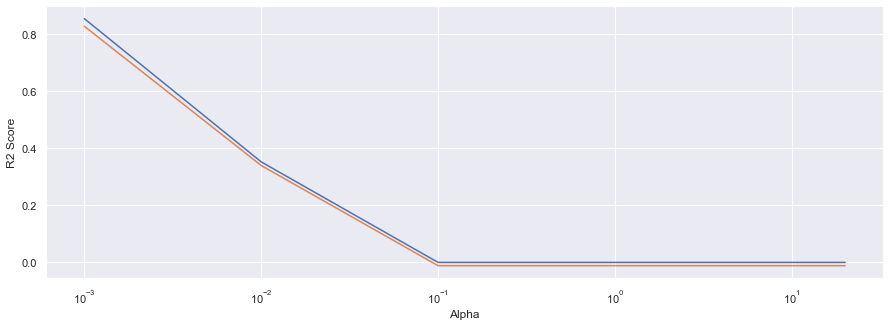

In [385]:
plt.figure(figsize=(15,5))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [386]:
# Checking the best parameter i.e Alpha value
model_cv.best_params_

{'alpha': 0.001}

In [387]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print("################")
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8535144733164415
################
0.8504996035100237


In [388]:
model_param = list(lasso.coef_)
# model_param.insert(0,lasso.intercept_)
cols = X_train.columns
# cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [389]:
lasso_coef['Absolute Coef'] = lasso_coef['Coef'].abs()

In [390]:
lasso_coef.sort_values(by='Absolute Coef',ascending=False).head(10)

,Feature,Coef,Absolute Coef
22,GrLivArea,0.243788,0.243788
3,OverallQual,0.132038,0.132038
34,GarageArea,0.054852,0.054852
12,BsmtFinSF1,0.051577,0.051577
29,KitchenQual,0.048460,0.048460
6,ExterQual,0.037492,0.037492
88,Neighborhood_NridgHt,0.034859,0.034859
87,Neighborhood_NoRidge,0.034375,0.034375
8,BsmtQual,0.029411,0.029411
31,Fireplaces,0.027934,0.027934


# Based on above final lasso model, top 5 parameters are 
1. GrLivArea - Positively impacting
2. OverallQual - Positively impacting
3. GarageArea - Positively impacting
4. BsmtFinSF1 - Positively impacting
5. KithenQual - Positively impacting

In [391]:
#ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("###############")
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9275022437902746
###############
0.8555332745988229


In [392]:
#As we can see the above alpha value is not optimal for ridge 
#there are sign of overfitting the clear difference we can see in the train and test score
#improving Model with optimal value of alpha
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
model = Ridge()
model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [393]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007082,0.002067,0.001195,0.000397,0.001,{'alpha': 0.001},0.801440,0.917244,0.739052,0.862596,0.893110,0.877870,0.901182,0.527489,0.873473,0.918568,0.831074,0.114237,10,0.931624,0.925526,0.938693,0.931046,0.927401,0.929260,0.927144,0.939092,0.929692,0.926290,0.930577,0.004560
1,0.007879,0.001809,0.001795,0.001467,0.010,{'alpha': 0.01},0.807460,0.917588,0.743619,0.863014,0.893582,0.878285,0.901577,0.527628,0.874027,0.918688,0.832420,0.113825,9,0.931609,0.925523,0.938678,0.931044,0.927399,0.929257,0.927140,0.939089,0.929688,0.926287,0.930571,0.004558
2,0.006583,0.003253,0.001496,0.001021,0.100,{'alpha': 0.1},0.827051,0.920012,0.775448,0.866657,0.897122,0.879757,0.904780,0.528674,0.878684,0.919413,0.839642,0.111975,8,0.931302,0.925342,0.938093,0.930879,0.927223,0.929096,0.926924,0.938962,0.929485,0.926112,0.930342,0.004497
3,0.006251,0.007656,0.000000,0.000000,0.200,{'alpha': 0.2},0.836851,0.921430,0.797713,0.869549,0.899794,0.880601,0.907165,0.530215,0.882514,0.919895,0.844460,0.110977,7,0.930816,0.924970,0.937112,0.930521,0.926851,0.928761,0.926497,0.938735,0.929083,0.925765,0.929911,0.004422
4,0.007811,0.007811,0.000000,0.000000,0.500,{'alpha': 0.5},0.850811,0.922321,0.832081,0.874394,0.904642,0.882116,0.911048,0.536007,0.889811,0.920890,0.852307,0.109183,5,0.929074,0.923478,0.933737,0.929035,0.925360,0.927383,0.924856,0.937845,0.927493,0.924359,0.928262,0.004273


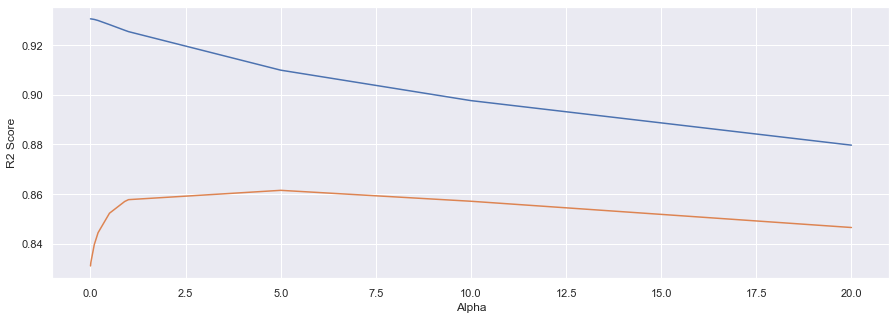

In [394]:
plt.figure(figsize=(15,5))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [395]:
# Checking the best parameter i.e Alpha value
model_cv.best_params_

{'alpha': 5.0}

In [396]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
print("#############")
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9093883820306795
#############
0.8783956857725159


In [397]:
model_parameter = list(ridge.coef_)
# model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
# cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [398]:
ridge_coef['Absolute Coef'] = ridge_coef['Coef'].abs()

In [399]:
ridge_coef.sort_values(by='Absolute Coef',ascending=False).head(10)

,Feature,Coef,Absolute Coef
132,RoofMatl_WdShngl,0.083791,0.083791
3,OverallQual,0.076204,0.076204
22,GrLivArea,0.071524,0.071524
20,2ndFlrSF,0.067378,0.067378
19,1stFlrSF,0.063716,0.063716
12,BsmtFinSF1,0.055792,0.055792
5,MasVnrArea,0.054060,0.054060
108,Condition2_PosN,-0.050774,0.050774
16,TotalBsmtSF,0.049924,0.049924
88,Neighborhood_NridgHt,0.045263,0.045263


# Based on above final ridge model, top 5 parameters are 
1. RoofMatl_WdShngl - Positively impacting
2. OverallQual - Positively impacting
3. GrLivArea - Positively impacting
4. 2ndFlrSF - Positively impacting
5. 1stFlrSF - Positively impacting

In [400]:
#after creating both Lasso and ridge model , We observe :
# R2_score are almost same for both
#but as lasso will penalize more on the dataset and can also help in feature elemination
#so we'll proceed with Lasso 


## Lasso Model is selected as final model
1. R2_score are almost same for both. There is no case of overfitting and there is low variance
2. It will help in feature selection as there are coefficient with 0 value

In [401]:
#Final Model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print('###########')
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8535144733164415
###########
0.8504996035100237


### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [402]:
# Current Value for alpha for Ridge : 5.0
# We will double it now i.e. we will take 10.0

In [403]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)
y_pred_Q1_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_Q1_train))
print("#############")
y_pred_Q1_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_Q1_test))
# Inference for this output will be provided in pdf

0.8979943619957331
#############
0.8782233124924561


In [404]:
model_parameter = list(ridge.coef_)
# model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
# cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [405]:
ridge_coef['Absolute Coef'] = ridge_coef['Coef'].abs()

In [406]:
ridge_coef.sort_values(by='Absolute Coef',ascending=False).head(10)
# Detailed inference for this output will be provided in pdf

,Feature,Coef,Absolute Coef
3,OverallQual,0.064864,0.064864
22,GrLivArea,0.059811,0.059811
132,RoofMatl_WdShngl,0.057261,0.057261
19,1stFlrSF,0.055137,0.055137
20,2ndFlrSF,0.053569,0.053569
12,BsmtFinSF1,0.048649,0.048649
16,TotalBsmtSF,0.044150,0.044150
5,MasVnrArea,0.043839,0.043839
88,Neighborhood_NridgHt,0.041586,0.041586
30,TotRmsAbvGrd,0.039618,0.039618


In [407]:
# Current Value for alpha for Lasso : 0.001
# We will double it now i.e. we will take 0.002

In [408]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
y_train_Q1_pred = lasso.predict(X_train)
y_test_Q1_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_Q1_pred))
print("################")
print(r2_score(y_true=y_test,y_pred=y_test_Q1_pred))
# Inference in pdf

0.8164451193947414
################
0.8142390295787713


In [409]:
model_param = list(lasso.coef_)
# model_param.insert(0,lasso.intercept_)
cols = df_train.columns
# cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [410]:
lasso_coef['Absolute Coef'] = lasso_coef['Coef'].abs()

In [411]:
lasso_coef.sort_values(by='Absolute Coef',ascending=False).head(10)

,Feature,Coef,Absolute Coef
22,GrLivArea,0.192256,0.192256
3,OverallQual,0.125110,0.125110
29,KitchenQual,0.053255,0.053255
12,BsmtFinSF1,0.039631,0.039631
34,GarageArea,0.039237,0.039237
6,ExterQual,0.030468,0.030468
8,BsmtQual,0.028749,0.028749
31,Fireplaces,0.027459,0.027459
88,Neighborhood_NridgHt,0.022575,0.022575
10,BsmtExposure,0.021100,0.021100


### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [412]:
# Now, the 5 most important predictors based on final lasso model were

# Based on above final lasso model, top 5 parameters are 
1. BsmtFullBath - Positively impacting
2. Overall Cond - Positively impacting
3. Lot Area - Negatively Impacting
4. Garage Qual - Positively impacting
5. BsmtFinType2 - Positively impacting

In [413]:
# We will remove these and re-run the final model with same alpha (alpha is not being changed in this case)

In [414]:
X_train = X_train.drop(['GrLivArea','OverallQual','GarageArea','BsmtFinSF1','KitchenQual'],axis = 'columns')
X_test = X_test.drop(['GrLivArea','OverallQual','GarageArea','BsmtFinSF1','KitchenQual'],axis = 'columns')

In [415]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_Q3_pred = lasso.predict(X_train)
y_test_Q3_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_Q3_pred))
print("################")
print(r2_score(y_true=y_test,y_pred=y_test_Q3_pred))

0.8340349652546906
################
0.8381509154856327


In [416]:
model_param = list(lasso.coef_)
# model_param.insert(0,lasso.intercept_)
cols = X_train.columns
# cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [417]:
lasso_coef['Absolute Coef'] = lasso_coef['Coef'].abs()

In [418]:
lasso_coef.sort_values(by='Absolute Coef',ascending=False).head(10)

,Feature,Coef,Absolute Coef
17,1stFlrSF,0.170602,0.170602
18,2ndFlrSF,0.133317,0.133317
5,ExterQual,0.083760,0.083760
14,TotalBsmtSF,0.073775,0.073775
29,GarageCars,0.051895,0.051895
7,BsmtQual,0.043755,0.043755
83,Neighborhood_NridgHt,0.043566,0.043566
27,Fireplaces,0.039895,0.039895
82,Neighborhood_NoRidge,0.032130,0.032130
9,BsmtExposure,0.027381,0.027381
